# Moringa school Project One Phase 1

## Overview

I will be working on a project where I will use exploratory data analysis to generate insights for a business stakeholder. The business problem is that Microsoft wants to create a new movie studio, but they lack knowledge in creating movies. My task is to explore the types of films that are currently performing well at the box office and provide actionable insights to the head of Microsoft's new movie studio. The goal is to help them decide what types of films to create and ensure the success of their new venture.

## Business problem

The business problem in this project is that Microsoft wants to enter the movie industry by creating a new movie studio, but they don't have any prior knowledge or experience in this field. The real-world problem is the lack of understanding of the current movie market and the types of films that are successful at the box office. The stakeholder in this case is the head of Microsoft's new movie studio who needs to make informed decisions about the type of films to create that would appeal to the audience and generate revenue.

## Objective

To use exploratory data analysis to identify the most successful movie genres at the box office and provide actionable insights to the head of Microsoft's new movie studio to help guide their decision-making process when creating new films.

## Business understnding

The project aims to explore what types of films are currently doing the best at the box office and translate those findings into actionable insights that can help the head of Microsoft's new movie studio in deciding what types of films to create. By analyzing the data, the project can provide insights into the popular genres, themes, and characteristics of successful films in the current market. This information can help the stakeholder make informed decisions and create films that would resonate with the audience and generate revenue for the company.

The stakeholders who could use this project include the head of Microsoft's new movie studio, the creative team responsible for creating the films, and the marketing team responsible for promoting the films. The insights generated from the analysis could be used to inform the creative direction of the studio's films and help the marketing team in identifying target audiences and designing effective promotional strategies.

In conclusion, this project's value lies in providing insights into the current movie market that can help Microsoft's new movie studio make informed decisions about the types of films to create. By understanding what types of films are currently successful, the studio can create films that appeal to the audience and generate revenue for the company.

## Datasets

We will be working with the following datasets:

Box Office Mojo (bom.movie_gross.csv)

Rotten Tomatoes (rt.movie_info.tsv)

TheMovieDB (tmdb.movies.csv)

The Numbers (tn.movie_budgets.csv)

Let's start by importing all the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

LET'S LOAD ALL THE IMPORTANT DATASETS

In [2]:
df_bom_movie = pd.read_csv(r'C:\Users\User\Downloads\Moringa_Project\dsc-phase-1-project-v2-4\zippedData\bom.movie_gross.csv')

df_tmdb_movies = pd.read_csv(r'C:\Users\User\Downloads\Moringa_Project\dsc-phase-1-project-v2-4\zippedData\tmdb.movies.csv')

df_rt_movie_info = pd.read_csv(r'C:\Users\User\Downloads\Moringa_Project\dsc-phase-1-project-v2-4\zippedData\rt.movie_info.tsv', sep='\t')

df_tn_movie_budgetsn = pd.read_csv(r'C:\Users\User\Downloads\Moringa_Project\dsc-phase-1-project-v2-4\zippedData\tn.movie_budgets.csv')

GETTING THE SUMMARY OF ALL THE DATASETS LOADED AND THEIR SHAPE

let's clean the df_tn_movie_budgetsn dataset

In [3]:
missing=df_tn_movie_budgetsn.isna().sum()
missing

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Data preperation and cleaning

In [4]:
#let us calculate the total gross income in order to get the gross profits for each movies. 
#lets start by adding columns total gross and total profit.
df_tn_movie_budgetsn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
#In this cell we will be removing the $ from the dataset.
df_tn_movie_budgetsn['domestic_gross'] = df_tn_movie_budgetsn['domestic_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_tn_movie_budgetsn['worldwide_gross'] = df_tn_movie_budgetsn['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_tn_movie_budgetsn['production_budget'] = df_tn_movie_budgetsn['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_tn_movie_budgetsn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [6]:
# convert worldwide_gross column to numeric by removing dollar signs and commas
df_tn_movie_budgetsn['worldwide_gross'] = df_tn_movie_budgetsn['worldwide_gross'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)



# convert domestic_gross column to numeric
df_tn_movie_budgetsn['domestic_gross'] = pd.to_numeric(df_tn_movie_budgetsn['domestic_gross'], errors='coerce')

# add a new column Total_gross which is the sum of domestic_gross and foreign_gross columns
df_tn_movie_budgetsn['Total_gross'] = df_tn_movie_budgetsn['domestic_gross'] + df_tn_movie_budgetsn['worldwide_gross']


In [7]:
df_tn_movie_budgetsn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Total_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.889770e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2.676000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00


In [8]:
#lets create another column of the gross profits.
df_tn_movie_budgetsn['Gross_profit'] = df_tn_movie_budgetsn['Total_gross'] - df_tn_movie_budgetsn['production_budget']

df_tn_movie_budgetsn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Total_gross,Gross_profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00,-7.000000e+03
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.889770e+05,2.829770e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2.676000e+03,-2.324000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00,-1.400000e+03


Lets see which first 10 movies made the highest profits

In [9]:
#looking for missing values
df_bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
#Removing duplicates
duplicates = df_bom_movie['title'].duplicated()
df_bom_movie.drop_duplicates(inplace=True)


In [11]:
#Handling missing values
print('The domestic_gross column has', df_bom_movie['domestic_gross'].isnull().sum(), 'missing values')

print('The Foreign_gross column has', df_bom_movie['foreign_gross'].isnull().sum(), 'values')

print('The Year column has', df_bom_movie['year'].isnull().sum(), 'missing values')

print('The title column has', df_bom_movie['title'].isnull().sum(), 'missing values')

The domestic_gross column has 28 missing values
The Foreign_gross column has 1350 values
The Year column has 0 missing values
The title column has 0 missing values


In [12]:
#lets replace the missing values in each column with the means of each column
df_bom_movie['foreign_gross'].fillna(0, inplace=True)
#df_bom_movie.fillna(0), inplace=True)
df_bom_movie['domestic_gross'].fillna(0, inplace=True)

In [13]:
#The foreign_gross column contains non-numeric values. Before computing the mean of the column, we need to convert those values to numbers. We can try the following:

df_bom_movie['foreign_gross'] = pd.to_numeric(df_bom_movie['foreign_gross'], errors='coerce')
mean_foreign_gross = df_bom_movie['foreign_gross'].mean()
df_bom_movie['foreign_gross'].fillna(mean_foreign_gross, inplace=True)


In [14]:
#lets confirm whether the dataset is now clean
print('The domestic_gross column has', df_bom_movie['domestic_gross'].isnull().sum(), 'missing values')

print('The Foreign_gross column has', df_bom_movie['foreign_gross'].isnull().sum(), 'values')

print('The Year column has', df_bom_movie['year'].isnull().sum(), 'missing values')

The domestic_gross column has 0 missing values
The Foreign_gross column has 0 values
The Year column has 0 missing values


In [15]:
#lets clean the tmdb_movies dataset
missing_values_count = df_tmdb_movies.isnull().sum()
print(missing_values_count)


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [16]:
#lets lool for duplicates in the original_title column
duplicates = df_tmdb_movies['original_title'].duplicated()
print(duplicates.sum())


1682


In [17]:
#The percentage of the duplicates
duplicates = df_tmdb_movies['original_title'].duplicated()
duplicate_count = duplicates.sum()
total_count = len(df_tmdb_movies)
duplicate_percentage = (duplicate_count / total_count) * 100
print(f"Duplicate percentage: {duplicate_percentage:.2f}%")

Duplicate percentage: 6.34%


In [18]:
#It seems that that's a very small percentage. Lets keep only the first row in a case of duplicates.
df_tmdb_movies.drop_duplicates(subset='original_title', keep='first', inplace=True)

#lets confirm if we have removed the duplicates
duplicates = df_tmdb_movies['original_title'].duplicated()
print(duplicates.sum())

0


In [19]:
df_tmdb_movies['Best_movie'] = df_tmdb_movies['vote_average'] * df_tmdb_movies['vote_count']
df_tmdb_movies.shape

(24835, 11)

In [20]:
#The highest rating
r=df_tmdb_movies['vote_average'].max()
print(f"The highest rating: {r}")

#The movie that received the highets number of votes and with a maximum rating of 10
best_voted_movie = df_tmdb_movies.query('vote_average == 10').sort_values('Best_movie', ascending=False)['title'].iloc[0]
print(f"Best voted movie: {best_voted_movie}")

#The most watched movie
most_watched_film = df_tmdb_movies.sort_values('vote_count', ascending=False)['title'].iloc[0]
print(f"Most watched film: {most_watched_film}")



The highest rating: 10.0
Best voted movie: Love on a Leash
Most watched film: Inception


# Perfect! Let's now start visualizing the datasets

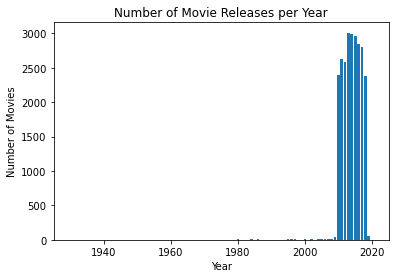

In [21]:
# convert release_date to datetime format
df_tmdb_movies['release_date'] = pd.to_datetime(df_tmdb_movies['release_date'])

# extract year and create a new column named 'release_year'
df_tmdb_movies['release_year'] = df_tmdb_movies['release_date'].dt.year

# count number of movies released per year
movies_per_year = df_tmdb_movies['release_year'].value_counts().sort_index()

# create a bar chart
plt.bar(movies_per_year.index, movies_per_year.values)
plt.title('Number of Movie Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


In [22]:
#the graph seems to contain outliers. lets see how many movies were release before 2010

movies_before_2010 = df_tmdb_movies[df_tmdb_movies['release_year'] < 2010]
num_movies_before_2010 = len(movies_before_2010)
print("Number of movies released before 2010:", num_movies_before_2010)



Number of movies released before 2010: 207


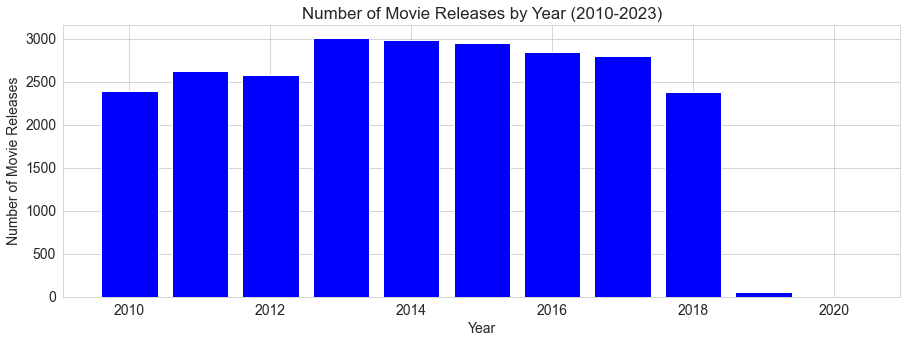

Many movies were released on 2013 followed by 2014 according to the dataset given


In [36]:
#we can drop the outliers. (any movie that was released before 2010 is considered an outlier), then plot the graph
year_count = df_tmdb_movies[df_tmdb_movies['release_year'] >= 2010]['release_year'].value_counts().sort_index()

plt.figure(figsize=(15,5))
plt.bar(year_count.index, year_count.values, color='b')
plt.title('Number of Movie Releases by Year (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Movie Releases')


plt.show()

print('Many movies were released on 2013 followed by 2014 according to the dataset given')


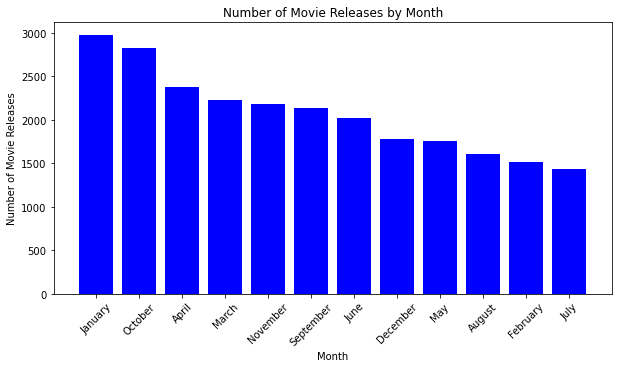

In [24]:
# Convert the release_date column to a datetime object
df_tmdb_movies['release_date'] = pd.to_datetime(df_tmdb_movies['release_date'])

# Extract the month from the release_date column and add it as a new column
df_tmdb_movies['release_month'] = df_tmdb_movies['release_date'].dt.month_name()

# Count the number of movie releases by month
month_count = df_tmdb_movies['release_month'].value_counts()

# Plot a bar chart of the results
plt.figure(figsize=(10,5))
plt.bar(month_count.index, month_count.values, color='b')
plt.title('Number of Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movie Releases')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


From the look at the graph many movies gained highest popularity in january, october and april. This makes these months to be the best months to release movies.

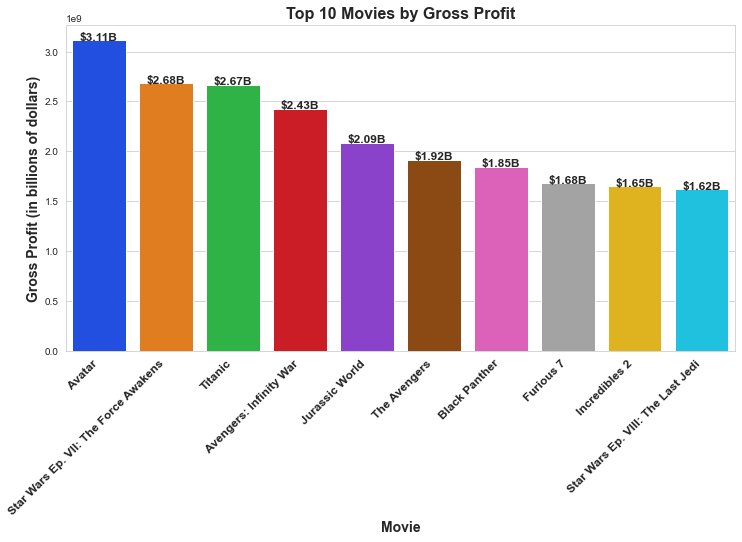

In [25]:
# Sort the dataframe by Gross_profit in descending order and get the top 10 movies
top_10 = df_tn_movie_budgetsn.sort_values(by='Gross_profit', ascending=False).head(10)

# Create the bar plot
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(x='movie', y='Gross_profit', data=top_10, palette='bright')
plt.title('Top 10 Movies by Gross Profit', fontsize=16, fontweight='bold')
plt.xlabel('Movie', fontsize=14, fontweight='bold')
plt.ylabel('Gross Profit (in billions of dollars)', fontsize=14, fontweight='bold')


# Add labels to the top of the bars
for i, v in enumerate(top_10['Gross_profit']):
    plt.text(i, v, f'${round(v/1e9, 2)}B', horizontalalignment='center', fontsize=12, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')

# Display the plot
plt.show()


Avatar did very well in terms of gross profit. followed by Star Wars Ep.VII: The Force Awakens, then titanic.

Let's see the time of the years these movies were released.

In [26]:
df_tn_movie_budgetsn[df_tn_movie_budgetsn['movie']=='Avatar']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Total_gross,Gross_profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09


In [27]:
df_tn_movie_budgetsn[df_tn_movie_budgetsn['movie']=='Star Wars Ep. VII: The Force Awakens']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Total_gross,Gross_profit
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.989973e+09,2.683973e+09


In [28]:
df_tn_movie_budgetsn[df_tn_movie_budgetsn['movie']=='Titanic']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Total_gross,Gross_profit
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.867572e+09,2.667572e+09


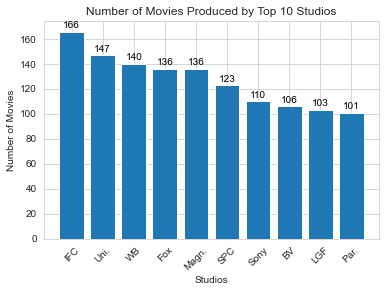

In [29]:
# Get the top 10 studios based on the number of movies produced
top_studios = df_bom_movie["studio"].value_counts().nlargest(10)

# Create a bar plot to visualize the number of movies produced by each studio
plt.bar(top_studios.index, top_studios.values)



# Set the chart title and axis labels
plt.title("Number of Movies Produced by Top 10 Studios")
plt.xlabel("Studios")
plt.ylabel("Number of Movies")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add text labels for number of movies produced
for i, v in enumerate(top_studios.values):
    plt.text(i, v+3, str(v), color='black', ha='center')
    
# Display the chart
plt.show()

IFC and Universal studios produced more movies than  any other film industry based on the dataset

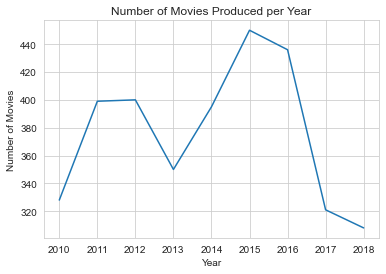

In [30]:
# Count the number of movies produced in each year
movies_per_year = df_bom_movie['year'].value_counts().sort_index()

# Create a line plot of the number of movies produced per year
plt.plot(movies_per_year.index, movies_per_year.values)

# Set the chart title and axis labels
plt.title('Number of Movies Produced per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Display the chart
plt.show()


2015 saw many movies being produces than any other year.

<ipython-input-31-fc5100e4ff1e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bom_movie.groupby('year')['domestic_gross', 'foreign_gross'].sum().plot(kind='line')


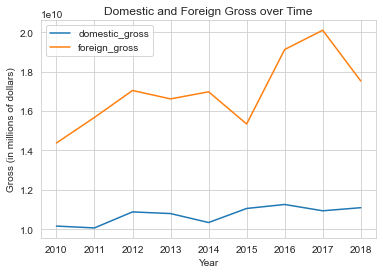

In [31]:
# create a line plot of domestic and foreign gross over time
df_bom_movie.groupby('year')['domestic_gross', 'foreign_gross'].sum().plot(kind='line')

# add a title and axis labels
plt.title('Domestic and Foreign Gross over Time')
plt.xlabel('Year')
plt.ylabel('Gross (in millions of dollars)')

# show the plot
plt.show()


Foreign gross is always higher than the domestic gross

In [32]:
# extract the genre column
genres = df_rt_movie_info["genre"]

# create a list to store all genres
all_genres = []
for genre_list in genres:
    if isinstance(genre_list, str): # check if the value is a string
        all_genres.extend(genre_list.split("|"))

# count the number of occurrences of each genre
genre_counts = {}
for genre in all_genres:
    if genre not in genre_counts:
        genre_counts[genre] = 1
    else:
        genre_counts[genre] += 1

# sort the genres by their counts in descending order
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# print the top 5 genres
for genre, count in sorted_genres[:5]:
    print(f"{genre}: {count}")


Drama: 912
Comedy: 550
Action and Adventure: 366
Mystery and Suspense: 309
Art House and International: 265


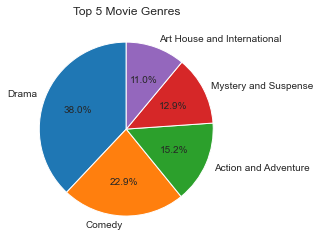

In [33]:
# count the number of occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# get the top 5 genres
top_genres = genre_counts[:5]# set up data for the chart
labels = top_genres.index.tolist()
sizes = top_genres.values.tolist()

# create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# add a title
ax1.set_title('Top 5 Movie Genres')

# show the chart
plt.show()


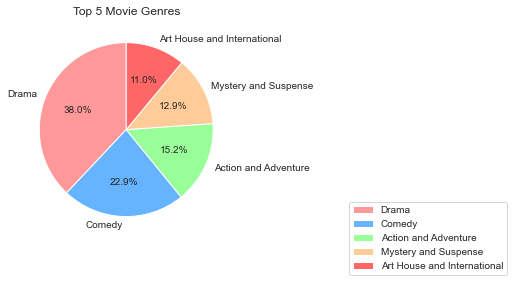

In [34]:
#Let's make the piechart more appealing by adding a key

top_genres = genre_counts[:5]
# set up data for the chart
labels = top_genres.index.tolist()
sizes = top_genres.values.tolist()

# set up colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ff6666']

# create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

# add a title
plt.title('Top 5 Movie Genres')

# add a legend
#plt.legend(loc='right', labels=labels)
#ax1.legend(loc='right')
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0))
# increase font size
plt.rcParams.update({'font.size': 14})

# show the chart
plt.show()


Drama and commedy tops with 38% and 22.9% respectively in terms of the most produced type of genres

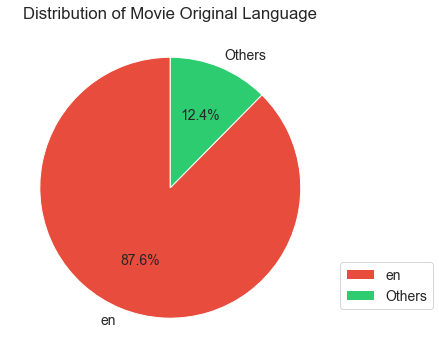

In [35]:
# extract the original language column
original_language = df_tmdb_movies["original_language"]

# get the counts for each language
languages_counts = original_language.value_counts()

# create a pie chart with the first language against the others
fig, ax = plt.subplots(figsize=(8,6))
ax.pie([languages_counts.iloc[0], languages_counts.iloc[1:].sum()], 
       labels=[languages_counts.index[0], "Others"], 
       autopct='%1.1f%%', startangle=90, colors=['#e74c3c', '#2ecc71'])
ax.set_title("Distribution of Movie Original Language")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.2))
plt.show()

Many movies were produced in English as the original language taking 87.6% compared to others

## Recommendations

Based on the above findings, here are some recommendations:

1. Plan to release movies in January, October, and April as these months seem to have a higher chance of success based on the popularity of released movies in the dataset.

2. Consider partnering with IFC and Universal Studios as they have produced more movies than other studios in the dataset.

3. Take note that foreign gross is always higher than domestic gross, so consider targeting international markets as well when promoting and marketing movies.

4. If looking for a blockbuster movie with high gross profits, consider producing movies like Avatar, Star Wars Ep.VII: The Force Awakens, and Titanic, which have a history of performing well in terms of gross profit.

5. Consider producing movies in English as it is the most common language in the dataset and may have a wider audience.

6. Produce more movies in the Drama and Comedy genres as they are the most popular.